In [106]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
CF=ComplexField(1000)
f = x^2+1;
f.roots()
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNew(n,m):
    def xjNewStep(n,m):
        f=J(n,m)
        fl=f.list()
        rt=0
        for i in [0..len(fl)-1]:
            rt=rt+fl[i]*x**i*(m**3*2**6)**i
        return rt
    return xjNewStep(n-1,m)
def j(n,m):return L(xjNew(n,m)/x)
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def leadingCoefficient(polynomial):
    dg=polynomial.degree()
    return polynomialCoefficient(dg,polynomial)
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def firstfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.first())
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})
def quotientFOvrG(f,g) : 
    return (f.maxima_methods().divide(g))[0]
def remainderFOvrG(f,g) : 
    return (f.maxima_methods().divide(g))[1]
def factor(polynomial):
    fp=polynomial.factor()
    return fp
def numberOfFactors(polynomial):
    fp=polynomial.factor()
    return len(fp)
def factorK(polynomial,k):
    fp=factor(h)
    return fp[k-1]
def factorList(polynomial):
    answer=[]
    nf=numberOfFactors(polynomial)
    for k in [1..nf]:
        answer=answer+[factorK(polynomial,k)]
    return answer
def polynomialExponentList(polynomial):
    pel=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        pel=pel+[exponent]
    return pel
def polynomialFactorBaseList(polynomial):
    fbl=[]
    fp=polynomial.factor()
    lf=len(fp)
    for n in [0..lf-1]:
        part = fp[n]
        (base,exponent) = part
        fbl=fbl+[base]
    return fbl
def absoluteValue(x,precision):
    return N(sqrt(norm(x)),digits=precision)

In [54]:
absoluteValue(I,5)

1.0000

In [ ]:
data=[]
for m in [3..500]:
    if 10 in divisors(m):
        print(m)
    data=data+[[m,j(120,m)]]
import pickle
wfile = open('/Users/barrybrent/8mar21no6.txt','a')
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()
# printing snipped.

In [ ]:
import pickle
rfile = open('/Users/barrybrent/8mar21no6.txt','r')
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/10mar21no8.txt','w') # interpolating polynomials
enoughfile=[]
for qpower in [0..120]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        poly=x*s[k][1] 
# times x because, to use polynomialCoefficient, I need a polynomial; not a Laurent series
        cf=polynomialCoefficient(qpower,poly)
        data=data+[[m,cf]]
    rl=R.lagrange_polynomial(data)
    polydata=polydata+[[qpower-1,rl]] 
    finish = time.time()
    print([qpower,finish-start])
# -1 because I want to record the coefficients of the qpowers of the original Laurent series
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close() # printing snipped.

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


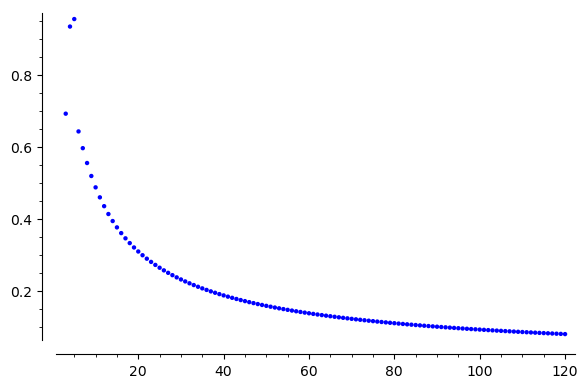

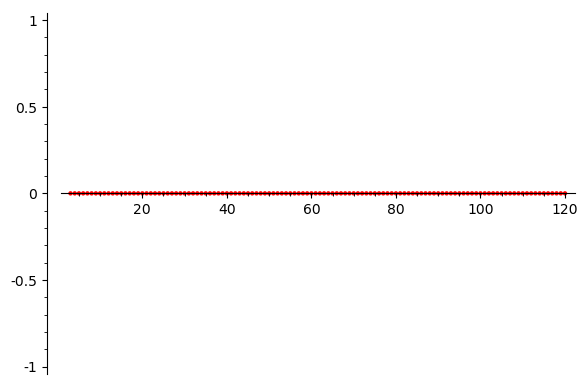

In [65]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
maxes=[]
mins=[]
for k in [3..len(s)-1]:
    ratios=[]
    n=s[k][0]
    print(n)
    poly=s[k][1]
    pr=poly.roots()
    for j in [0..len(pr)-1]:
        cfp=CF(pr[j][0])
        nc=N(cfp, digits=100)
        nl=n/ln(n)
        ratio=absoluteValue(nc/nl,20)
        ratios=ratios+[ratio]
    maxes=maxes+[[k,max(ratios)]]
    mins=mins+[[k,min(ratios)]]
show(list_plot(maxes,color='blue'))
show(list_plot(mins,color='red'))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


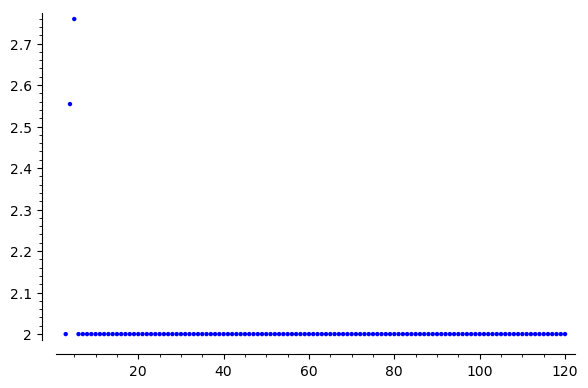

In [66]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
maxes=[]
for k in [3..len(s)-1]:
    abs=[]
    n=s[k][0]
    print(n)
    poly=s[k][1]
    pr=poly.roots()
    for j in [0..len(pr)-1]:
        cfp=CF(pr[j][0])
        ab=absoluteValue(cfp,100)
        abs=abs+[ab]
    maxes=maxes+[[k,max(abs)]]
show(list_plot(maxes,color='blue'))

('polynomial #', 119)


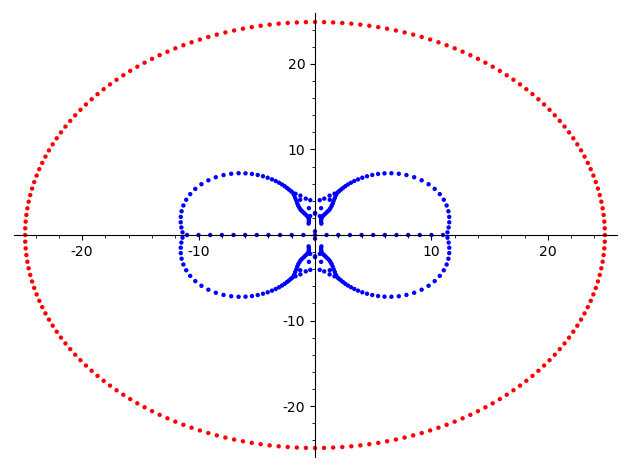

degree:  360
root count:  360


In [3]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
for k in [120..120]:
    points=[]
    n=s[k][0]
    print("polynomial #",n)
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        root=[real(root),imaginary(root)]
        points=points+[root]
        rootcount=rootcount+mult
    rootplot=list_plot(points,color='blue')
    radius=n/ln(n)
    circlepoints=[]
    for a in [0..199]:
        theta=(a/200)*(2*pi)
        point=[radius*cos(theta),radius*sin(theta)]
        circlepoints=circlepoints+[point]
    circle=list_plot(circlepoints,color='red')
    show(rootplot+circle)
    print "degree: ",poly.degree()
    print "root count: ",rootcount 

----------------------------------------------------------------------------------


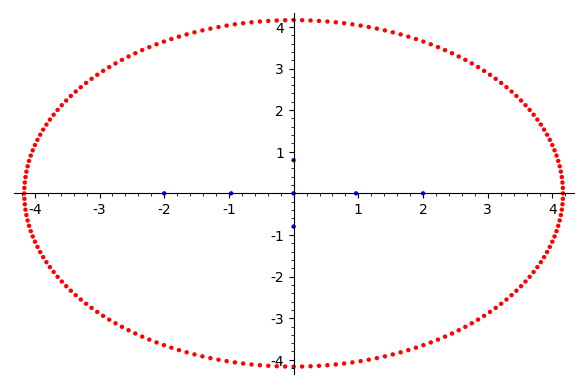

polynomial  2  degree:  9  good-root count:  9   root count:  9
----------------------------------------------------------------------------------


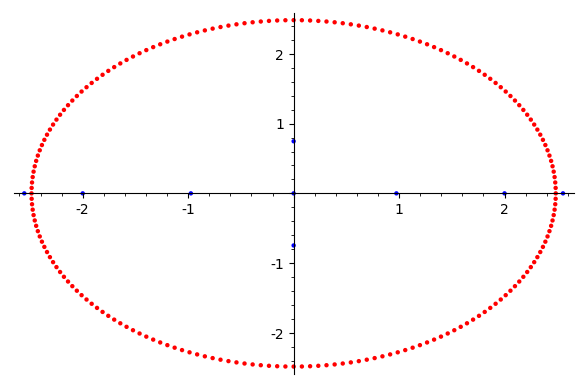

polynomial  3  degree:  12  good-root count:  10   root count:  12
----------------------------------------------------------------------------------


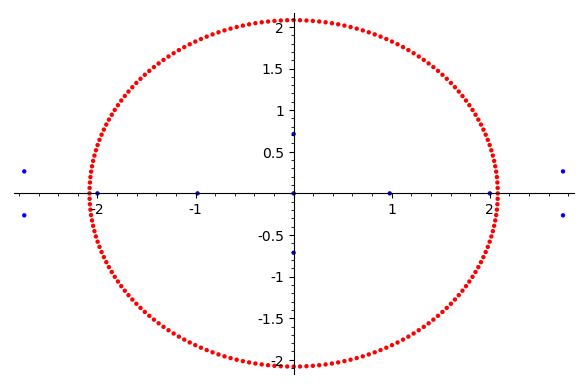

polynomial  4  degree:  15  good-root count:  11   root count:  15
----------------------------------------------------------------------------------


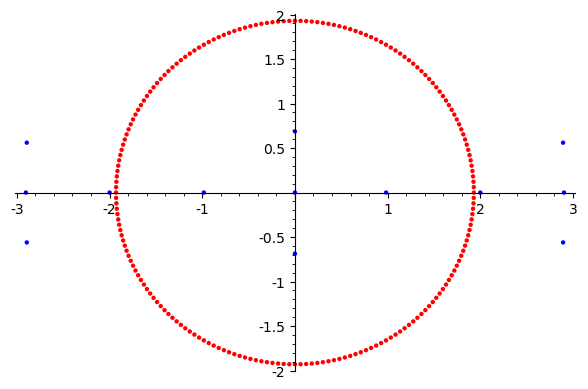

polynomial  5  degree:  18  good-root count:  10   root count:  18
----------------------------------------------------------------------------------


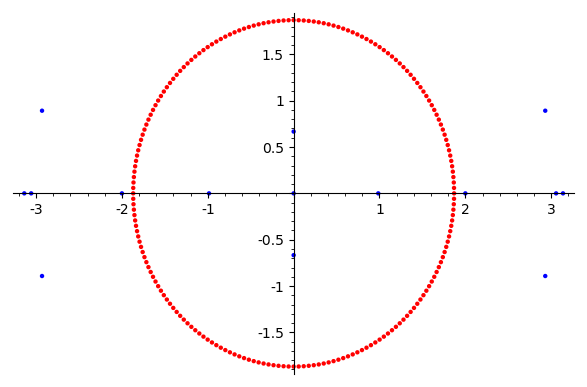

polynomial  6  degree:  21  good-root count:  11   root count:  21
----------------------------------------------------------------------------------


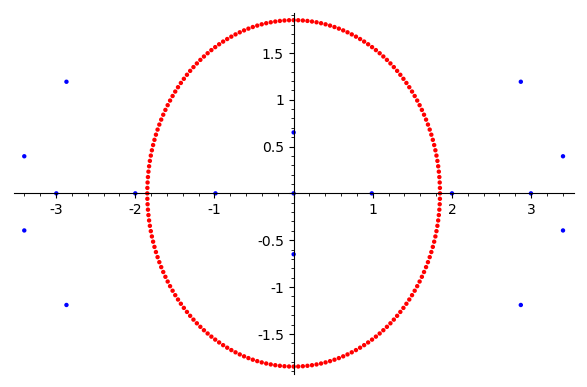

polynomial  7  degree:  24  good-root count:  12   root count:  24
----------------------------------------------------------------------------------


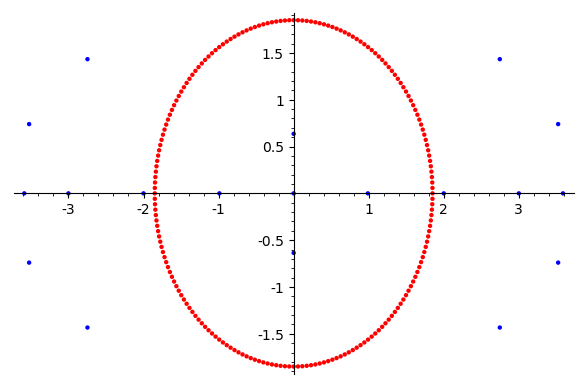

polynomial  8  degree:  27  good-root count:  13   root count:  27
----------------------------------------------------------------------------------


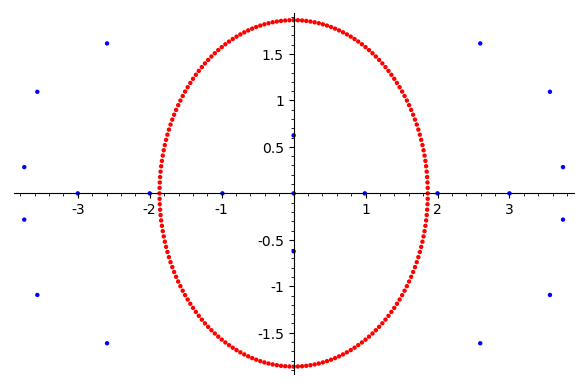

polynomial  9  degree:  30  good-root count:  14   root count:  30
----------------------------------------------------------------------------------


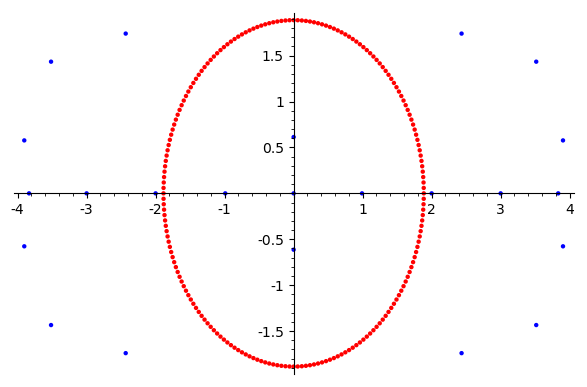

polynomial  10  degree:  33  good-root count:  15   root count:  33
----------------------------------------------------------------------------------


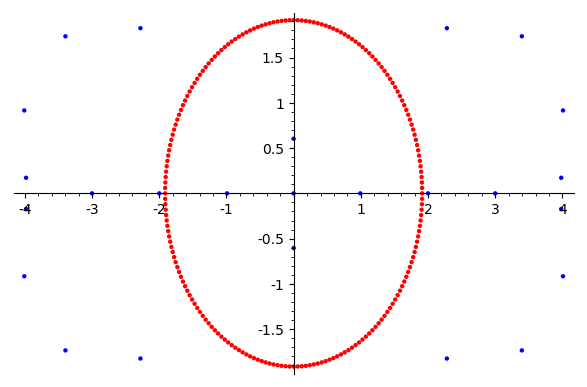

polynomial  11  degree:  36  good-root count:  16   root count:  36
----------------------------------------------------------------------------------


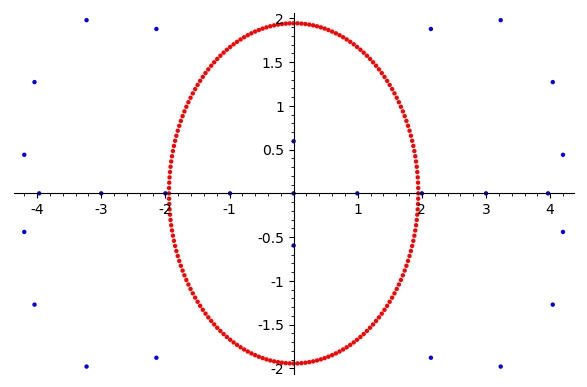

polynomial  12  degree:  39  good-root count:  17   root count:  39
----------------------------------------------------------------------------------


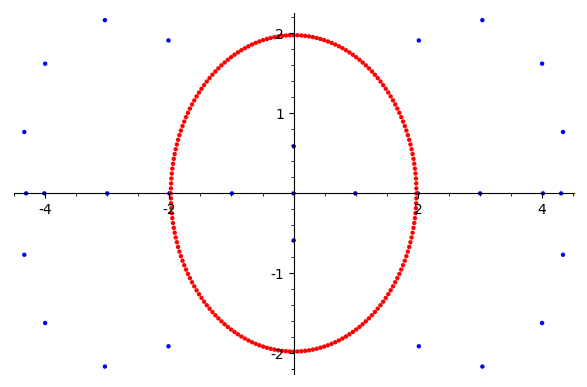

polynomial  13  degree:  42  good-root count:  18   root count:  42
----------------------------------------------------------------------------------


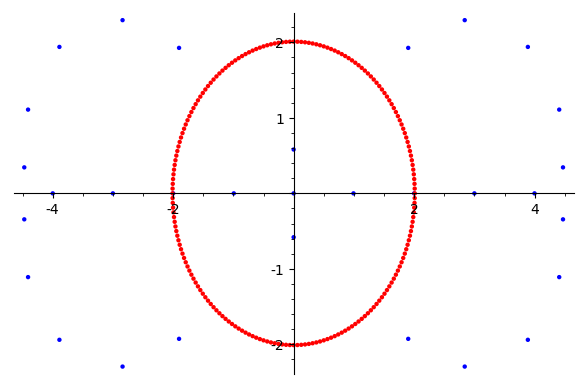

polynomial  14  degree:  45  good-root count:  21   root count:  45
----------------------------------------------------------------------------------


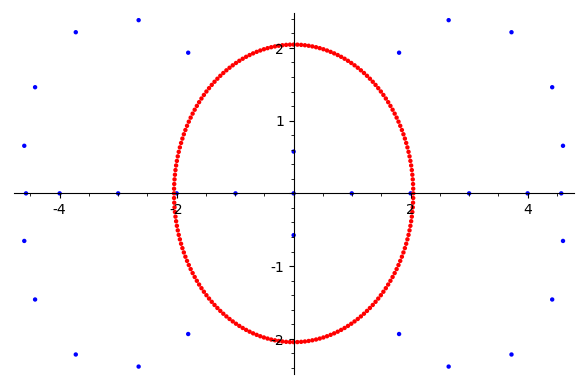

polynomial  15  degree:  48  good-root count:  22   root count:  48
----------------------------------------------------------------------------------


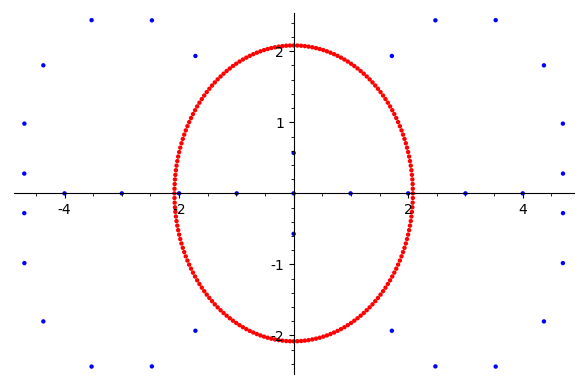

polynomial  16  degree:  51  good-root count:  23   root count:  51
----------------------------------------------------------------------------------


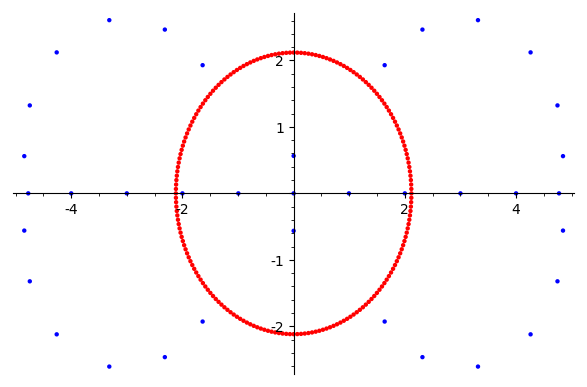

polynomial  17  degree:  54  good-root count:  24   root count:  54
----------------------------------------------------------------------------------


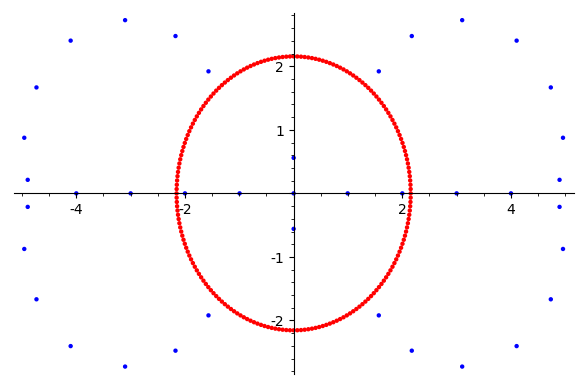

polynomial  18  degree:  57  good-root count:  25   root count:  57
----------------------------------------------------------------------------------


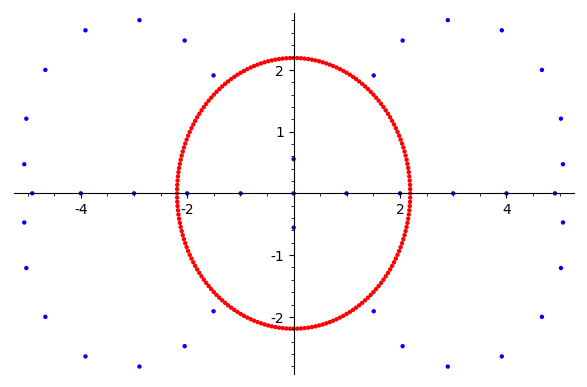

polynomial  19  degree:  60  good-root count:  26   root count:  60
----------------------------------------------------------------------------------


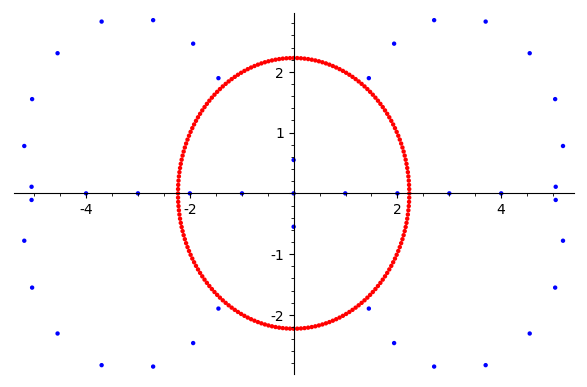

polynomial  20  degree:  63  good-root count:  27   root count:  63
----------------------------------------------------------------------------------


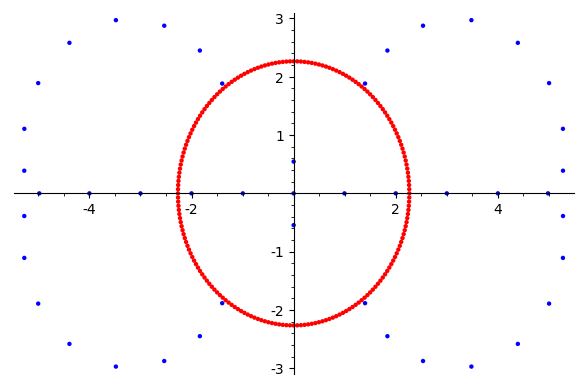

polynomial  21  degree:  66  good-root count:  28   root count:  66
----------------------------------------------------------------------------------


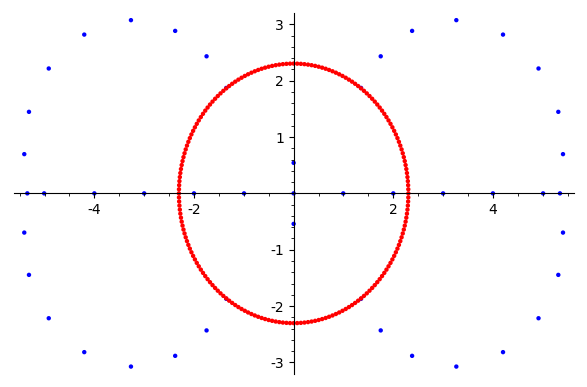

polynomial  22  degree:  69  good-root count:  29   root count:  69
----------------------------------------------------------------------------------


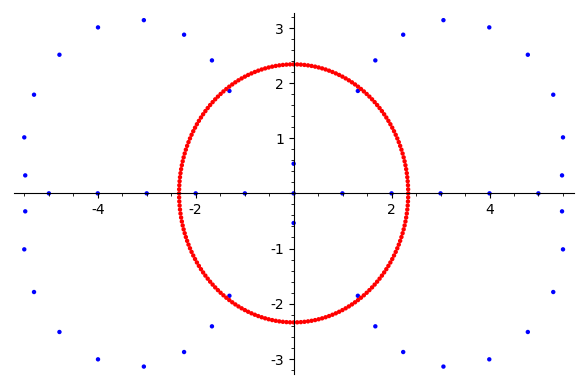

polynomial  23  degree:  72  good-root count:  34   root count:  72
----------------------------------------------------------------------------------


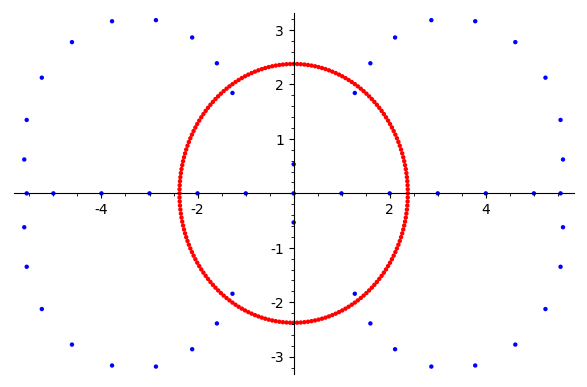

polynomial  24  degree:  75  good-root count:  35   root count:  75
----------------------------------------------------------------------------------


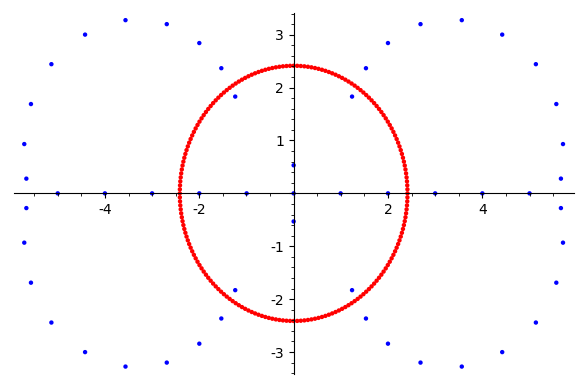

polynomial  25  degree:  78  good-root count:  36   root count:  78
----------------------------------------------------------------------------------


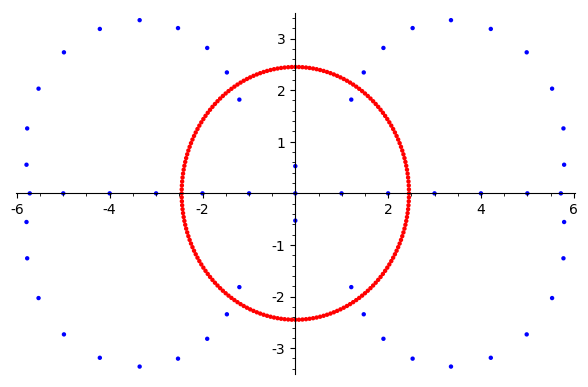

polynomial  26  degree:  81  good-root count:  37   root count:  81
----------------------------------------------------------------------------------


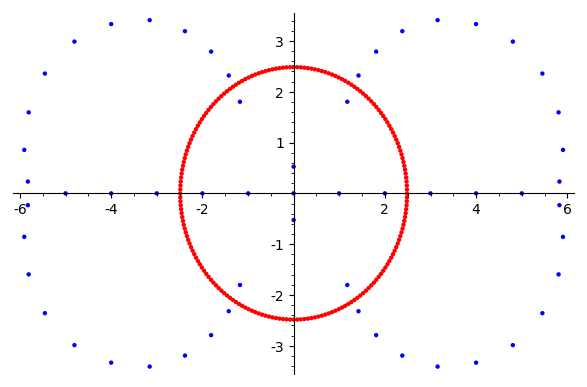

polynomial  27  degree:  84  good-root count:  38   root count:  84
----------------------------------------------------------------------------------


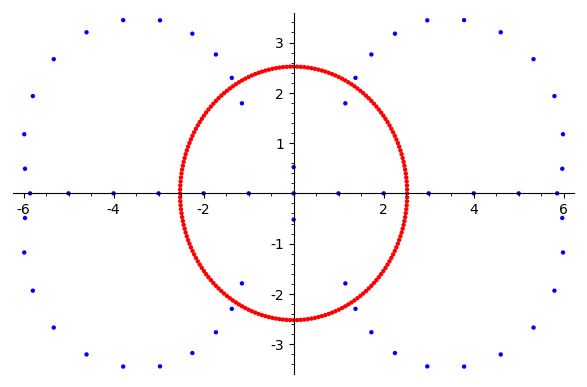

polynomial  28  degree:  87  good-root count:  39   root count:  87
----------------------------------------------------------------------------------


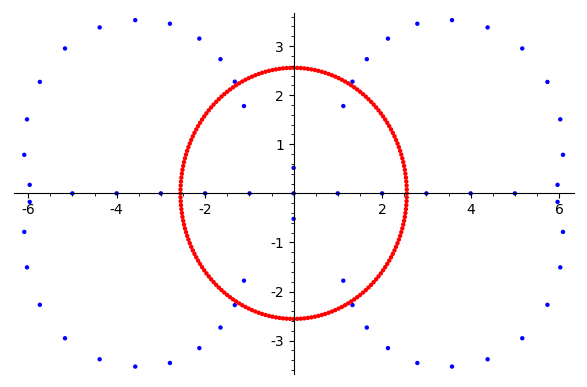

polynomial  29  degree:  90  good-root count:  40   root count:  90
----------------------------------------------------------------------------------


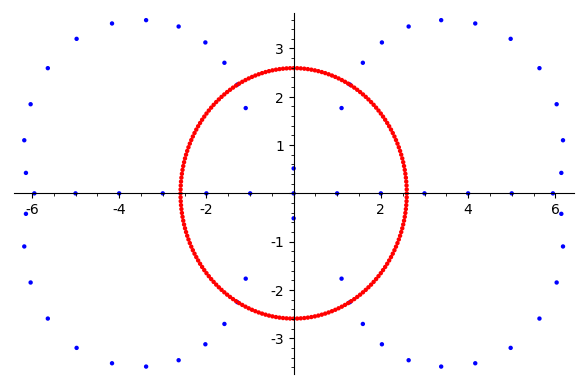

polynomial  30  degree:  93  good-root count:  41   root count:  93
----------------------------------------------------------------------------------


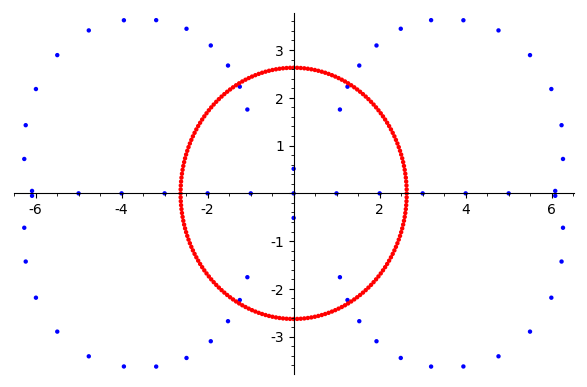

polynomial  31  degree:  96  good-root count:  46   root count:  96
----------------------------------------------------------------------------------


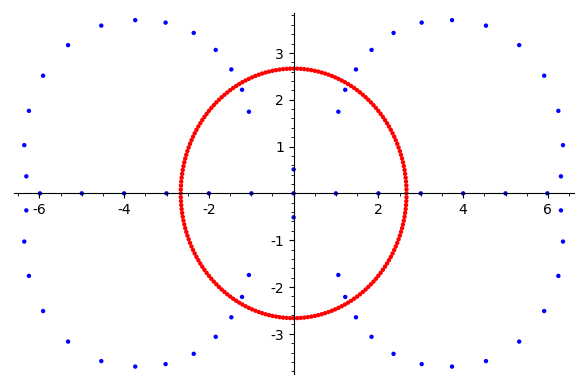

polynomial  32  degree:  99  good-root count:  47   root count:  99
----------------------------------------------------------------------------------


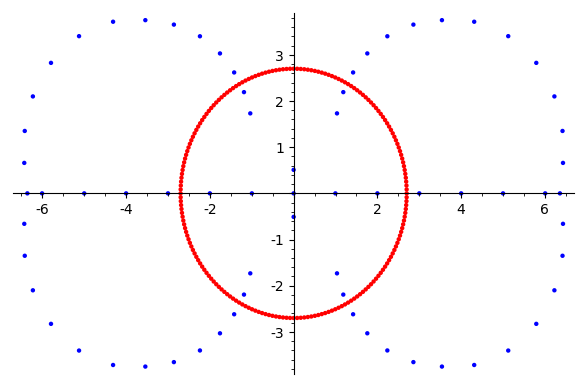

polynomial  33  degree:  102  good-root count:  48   root count:  102
----------------------------------------------------------------------------------


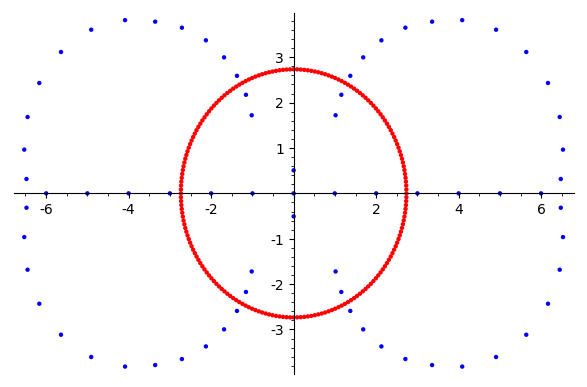

polynomial  34  degree:  105  good-root count:  49   root count:  105
----------------------------------------------------------------------------------


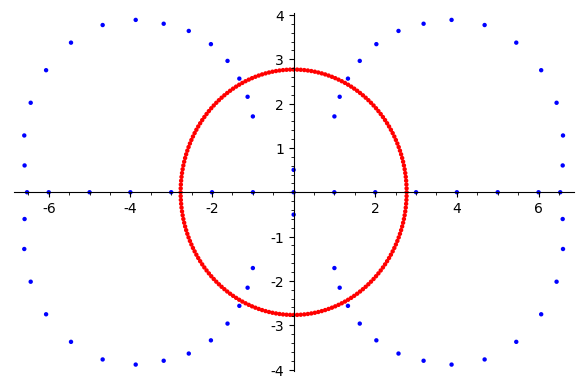

polynomial  35  degree:  108  good-root count:  50   root count:  108
----------------------------------------------------------------------------------


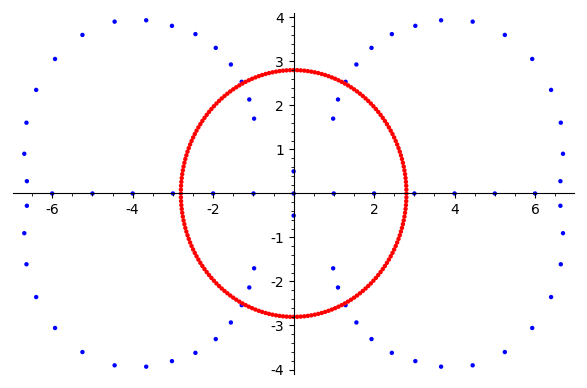

polynomial  36  degree:  111  good-root count:  51   root count:  111
----------------------------------------------------------------------------------


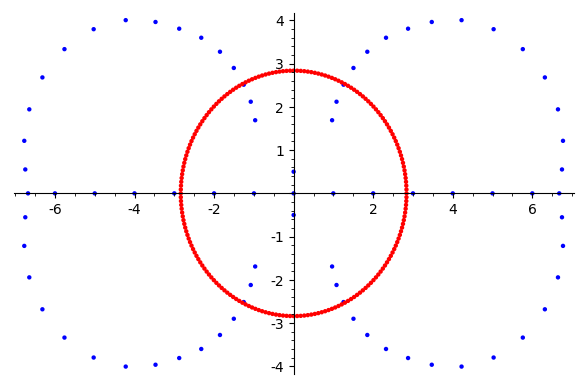

polynomial  37  degree:  114  good-root count:  56   root count:  114
----------------------------------------------------------------------------------


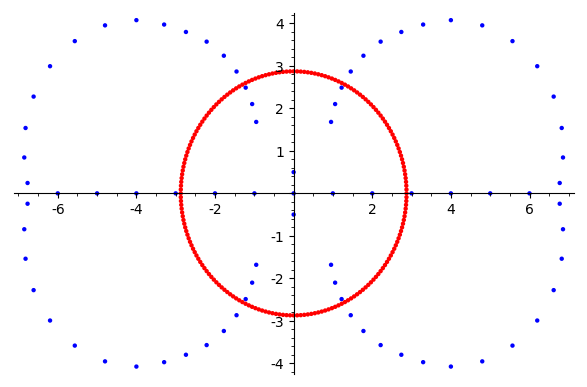

polynomial  38  degree:  117  good-root count:  57   root count:  117
----------------------------------------------------------------------------------


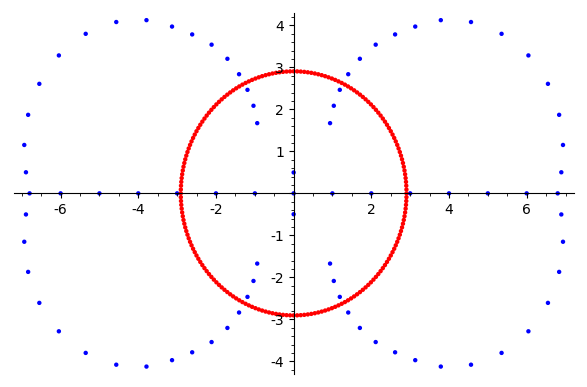

polynomial  39  degree:  120  good-root count:  58   root count:  120
----------------------------------------------------------------------------------


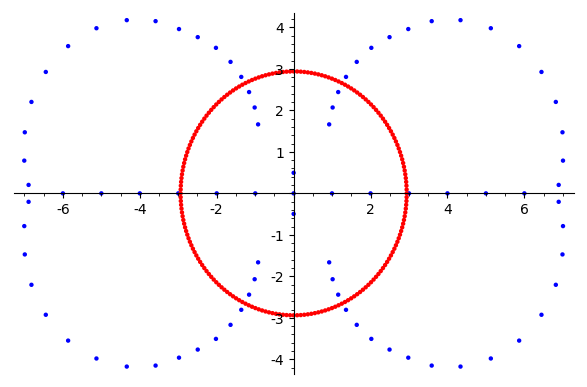

polynomial  40  degree:  123  good-root count:  59   root count:  123
----------------------------------------------------------------------------------


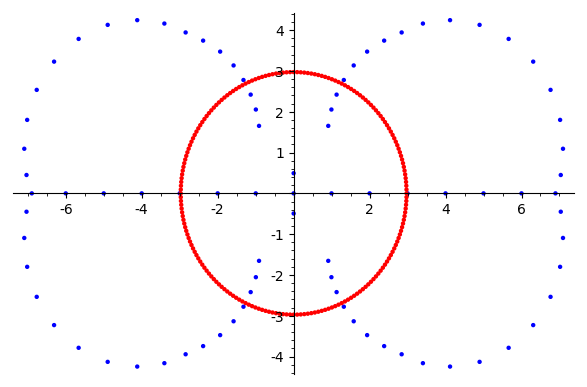

polynomial  41  degree:  126  good-root count:  60   root count:  126
----------------------------------------------------------------------------------


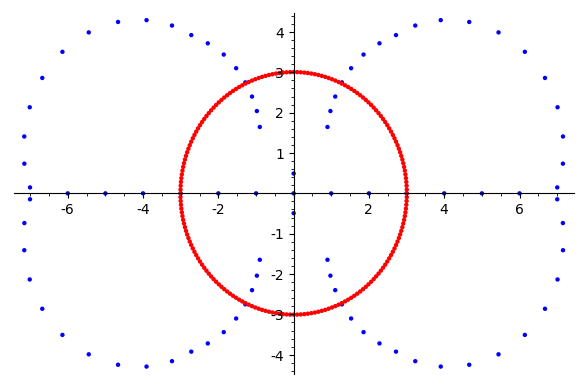

polynomial  42  degree:  129  good-root count:  63   root count:  129
----------------------------------------------------------------------------------


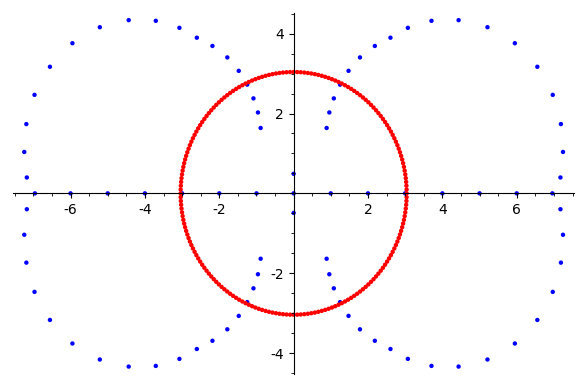

polynomial  43  degree:  132  good-root count:  68   root count:  132
----------------------------------------------------------------------------------


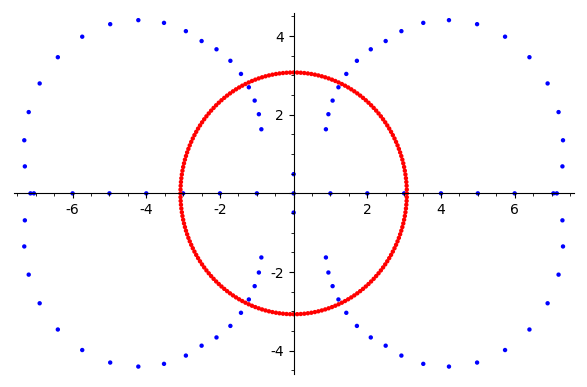

polynomial  44  degree:  135  good-root count:  69   root count:  135
----------------------------------------------------------------------------------


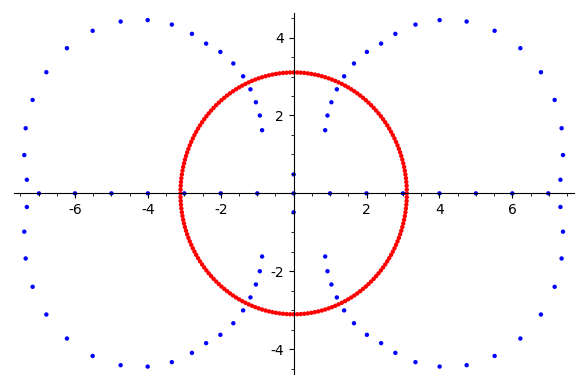

polynomial  45  degree:  138  good-root count:  70   root count:  138
----------------------------------------------------------------------------------


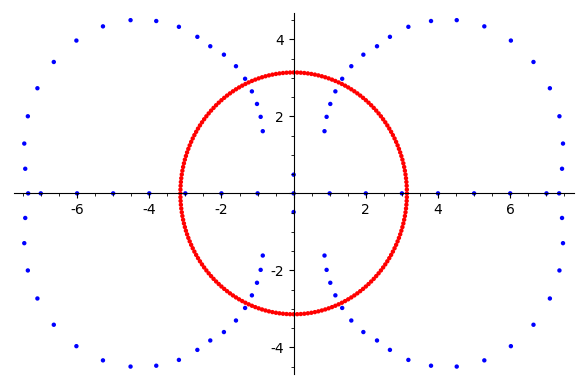

polynomial  46  degree:  141  good-root count:  71   root count:  141
----------------------------------------------------------------------------------


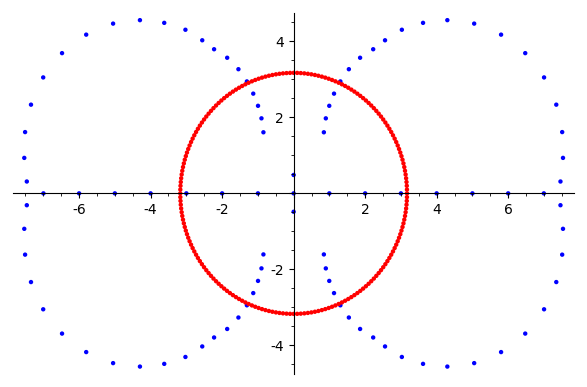

polynomial  47  degree:  144  good-root count:  72   root count:  144
----------------------------------------------------------------------------------


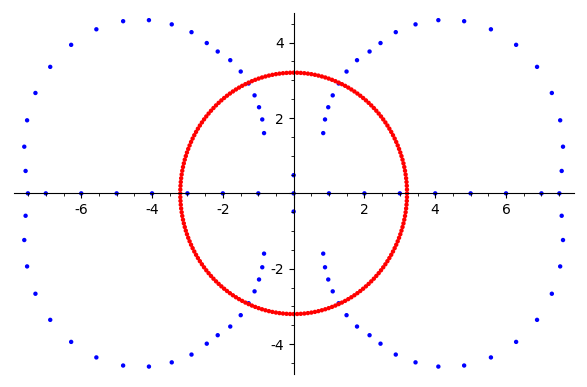

polynomial  48  degree:  147  good-root count:  77   root count:  147
----------------------------------------------------------------------------------


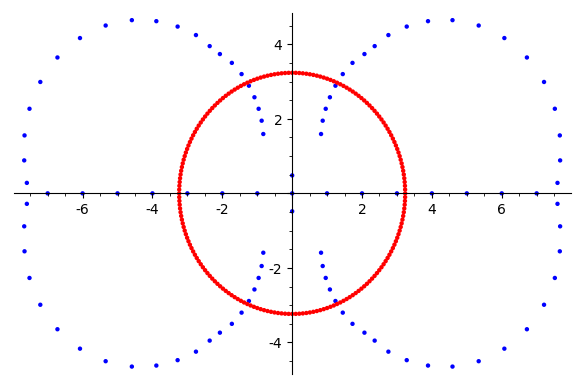

polynomial  49  degree:  150  good-root count:  78   root count:  150
----------------------------------------------------------------------------------


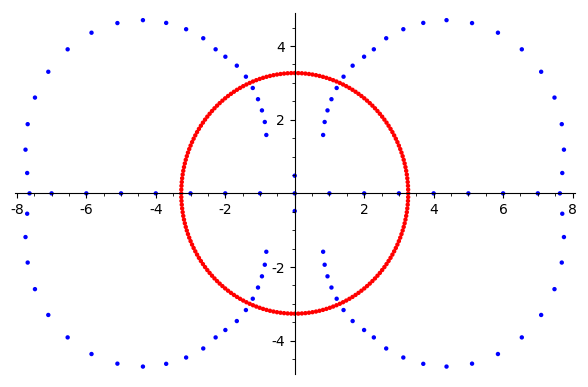

polynomial  50  degree:  153  good-root count:  79   root count:  153
----------------------------------------------------------------------------------


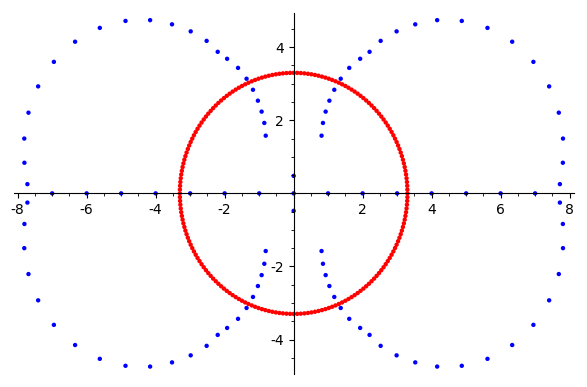

polynomial  51  degree:  156  good-root count:  80   root count:  156
----------------------------------------------------------------------------------


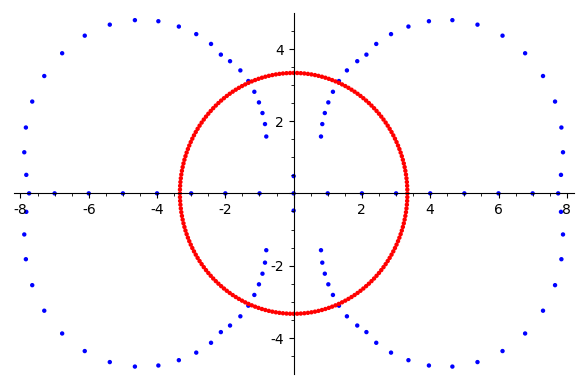

polynomial  52  degree:  159  good-root count:  81   root count:  159
----------------------------------------------------------------------------------


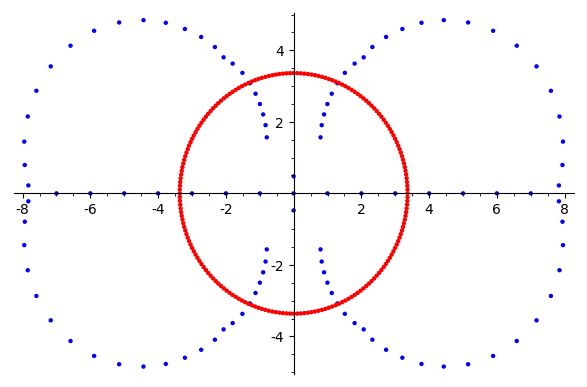

polynomial  53  degree:  162  good-root count:  86   root count:  162
----------------------------------------------------------------------------------


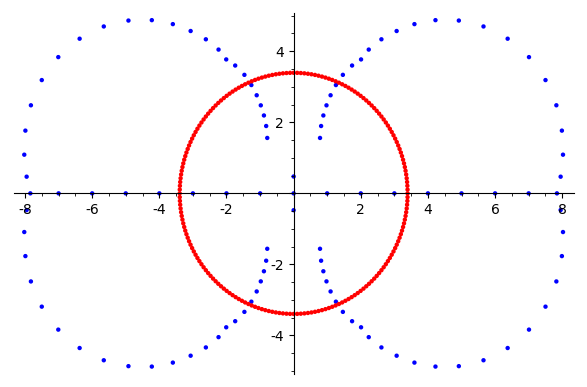

polynomial  54  degree:  165  good-root count:  87   root count:  165
----------------------------------------------------------------------------------


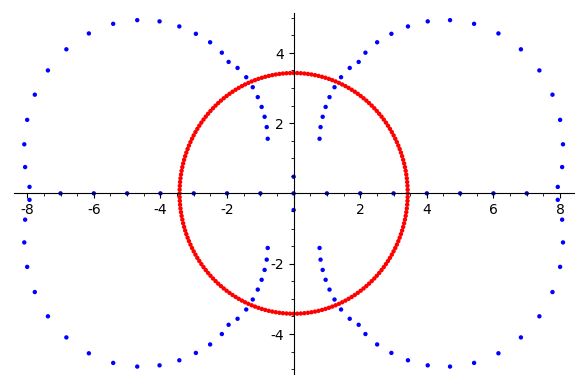

polynomial  55  degree:  168  good-root count:  88   root count:  168
----------------------------------------------------------------------------------


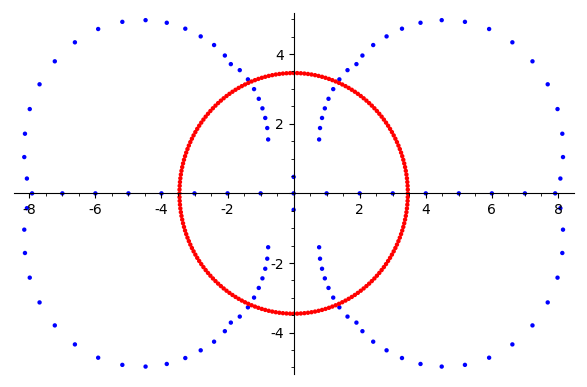

polynomial  56  degree:  171  good-root count:  89   root count:  171
----------------------------------------------------------------------------------


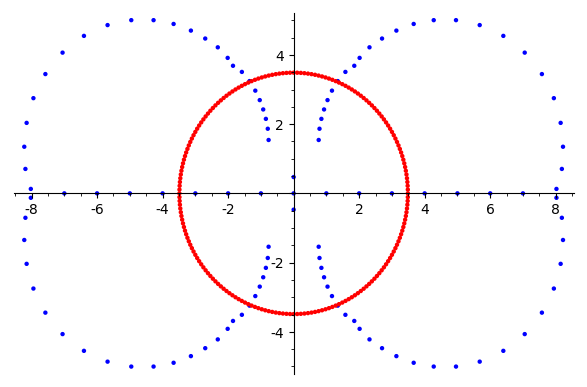

polynomial  57  degree:  174  good-root count:  90   root count:  174
----------------------------------------------------------------------------------


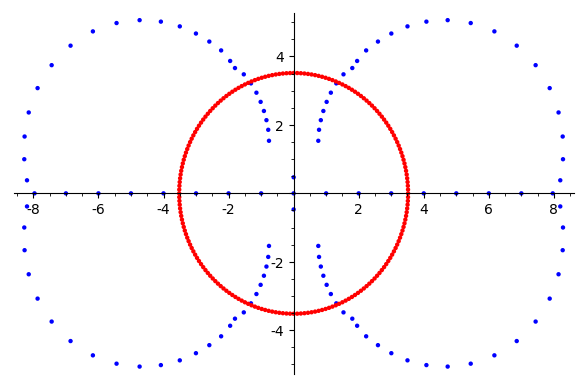

polynomial  58  degree:  177  good-root count:  95   root count:  177
----------------------------------------------------------------------------------


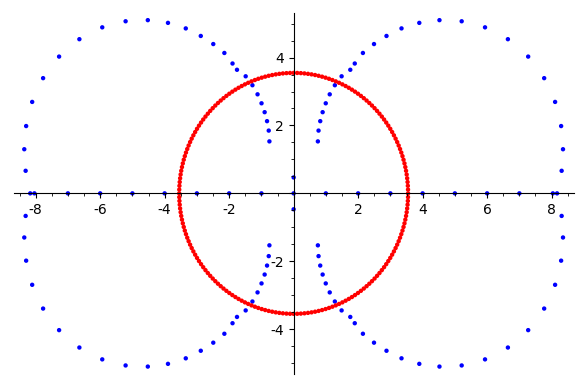

polynomial  59  degree:  180  good-root count:  96   root count:  180
----------------------------------------------------------------------------------


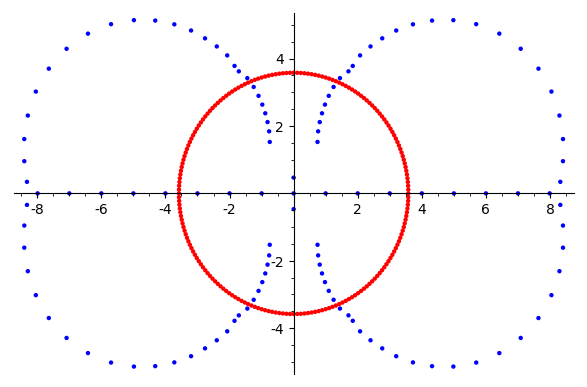

polynomial  60  degree:  183  good-root count:  97   root count:  183
----------------------------------------------------------------------------------


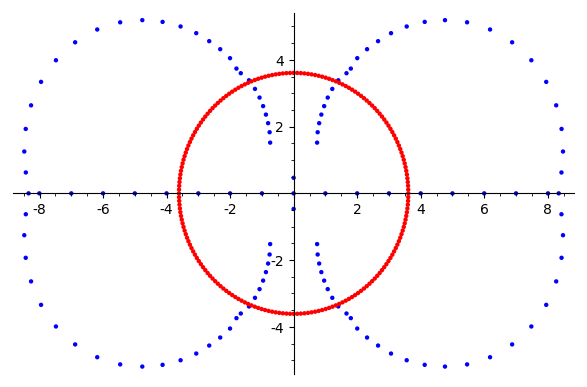

polynomial  61  degree:  186  good-root count:  98   root count:  186
----------------------------------------------------------------------------------


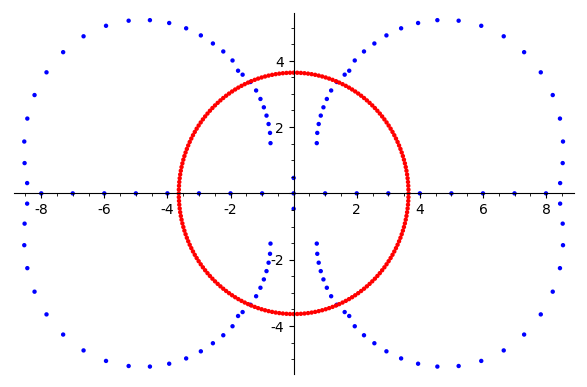

polynomial  62  degree:  189  good-root count:  103   root count:  189
----------------------------------------------------------------------------------


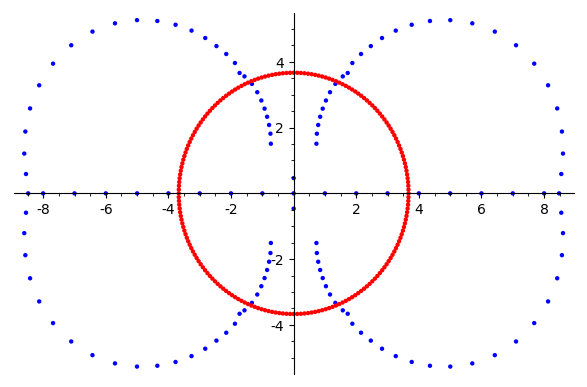

polynomial  63  degree:  192  good-root count:  104   root count:  192
----------------------------------------------------------------------------------


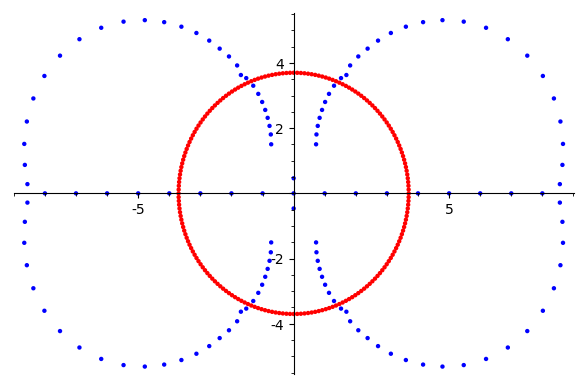

polynomial  64  degree:  195  good-root count:  105   root count:  195
----------------------------------------------------------------------------------


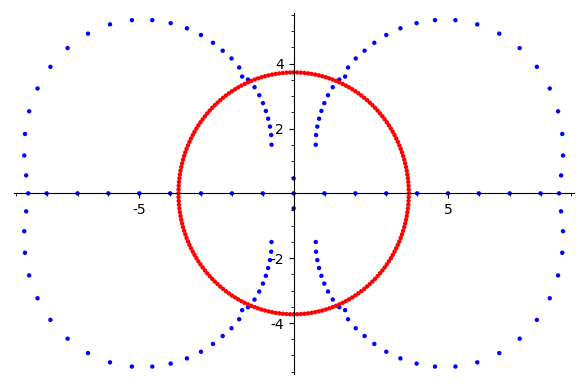

polynomial  65  degree:  198  good-root count:  106   root count:  198
----------------------------------------------------------------------------------


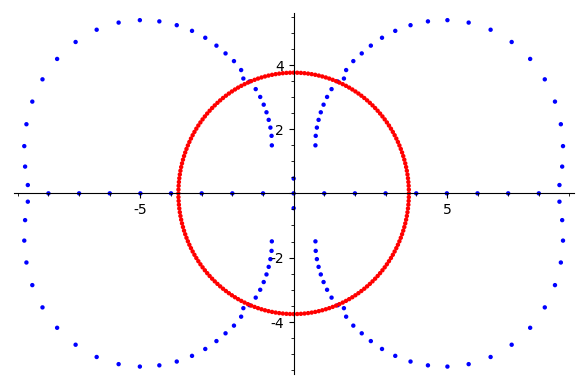

polynomial  66  degree:  201  good-root count:  107   root count:  201
----------------------------------------------------------------------------------


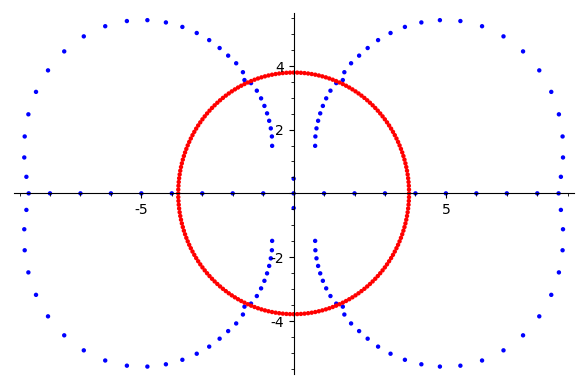

polynomial  67  degree:  204  good-root count:  112   root count:  204
----------------------------------------------------------------------------------


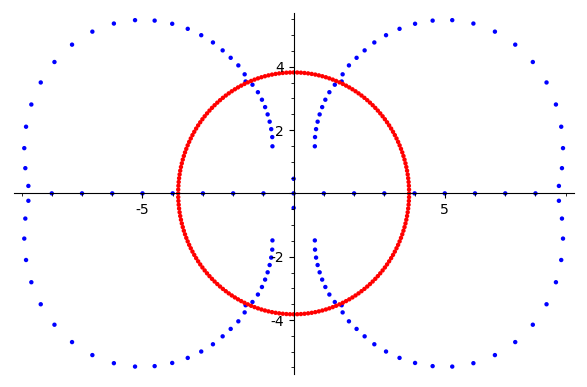

polynomial  68  degree:  207  good-root count:  113   root count:  207
----------------------------------------------------------------------------------


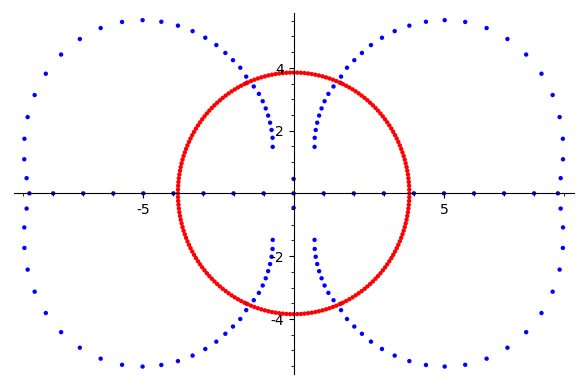

polynomial  69  degree:  210  good-root count:  114   root count:  210
----------------------------------------------------------------------------------


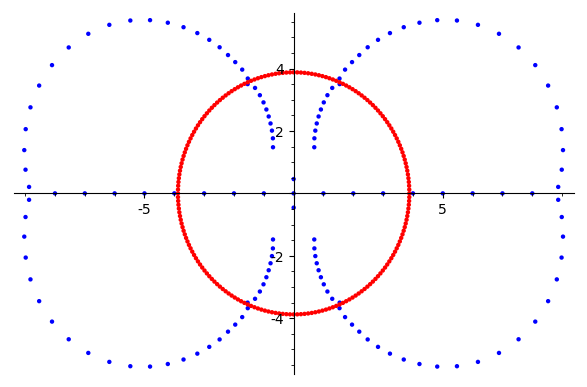

polynomial  70  degree:  213  good-root count:  119   root count:  213
----------------------------------------------------------------------------------


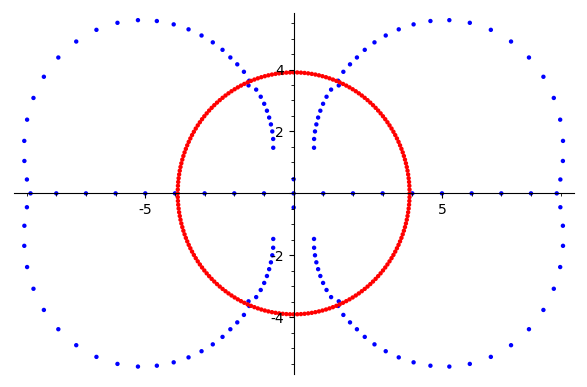

polynomial  71  degree:  216  good-root count:  120   root count:  216
----------------------------------------------------------------------------------


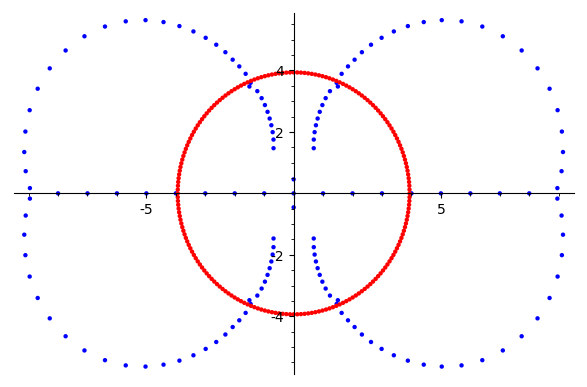

polynomial  72  degree:  219  good-root count:  125   root count:  219
----------------------------------------------------------------------------------


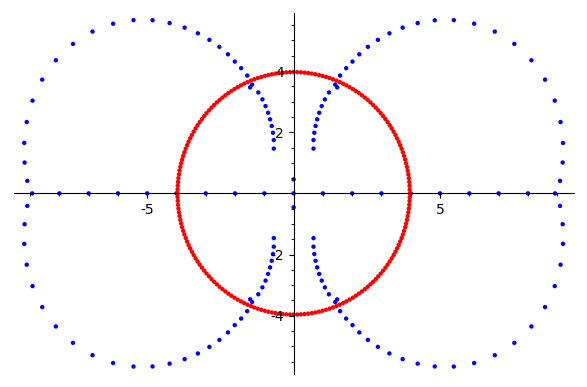

polynomial  73  degree:  222  good-root count:  126   root count:  222
----------------------------------------------------------------------------------


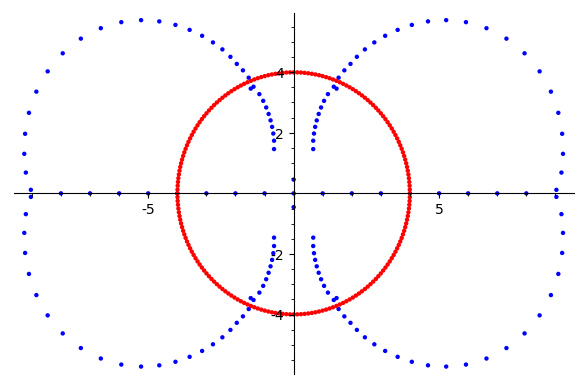

polynomial  74  degree:  225  good-root count:  127   root count:  225
----------------------------------------------------------------------------------


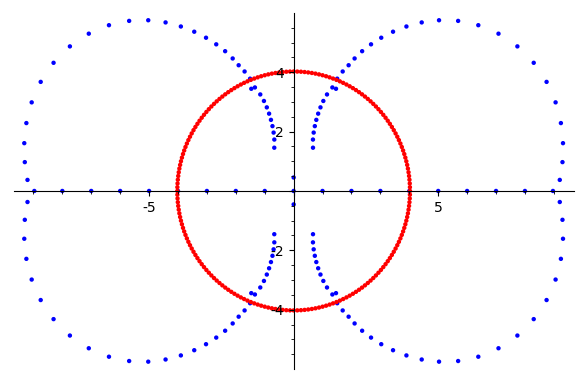

polynomial  75  degree:  228  good-root count:  130   root count:  228
----------------------------------------------------------------------------------


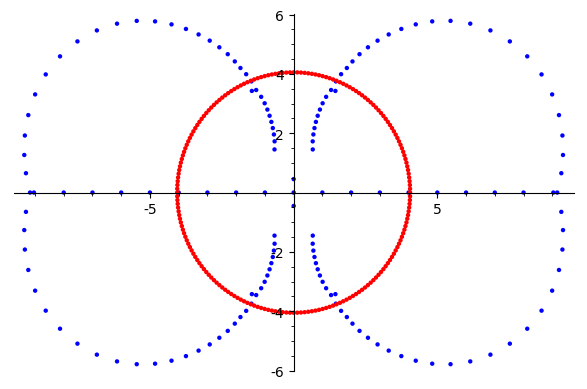

polynomial  76  degree:  231  good-root count:  135   root count:  231
----------------------------------------------------------------------------------


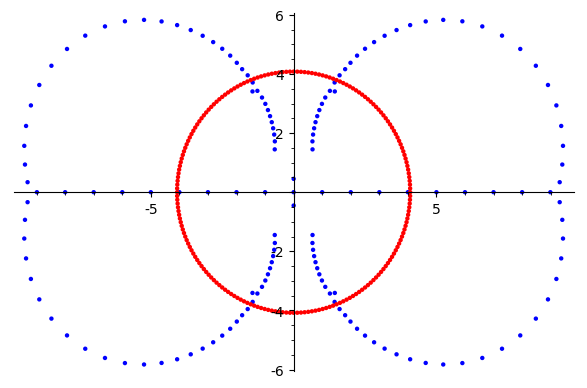

polynomial  77  degree:  234  good-root count:  136   root count:  234
----------------------------------------------------------------------------------


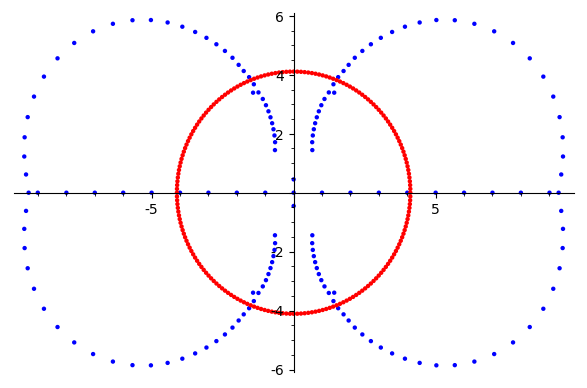

polynomial  78  degree:  237  good-root count:  137   root count:  237
----------------------------------------------------------------------------------


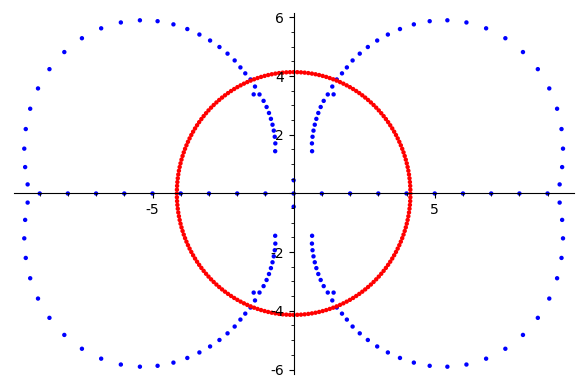

polynomial  79  degree:  240  good-root count:  138   root count:  240
----------------------------------------------------------------------------------


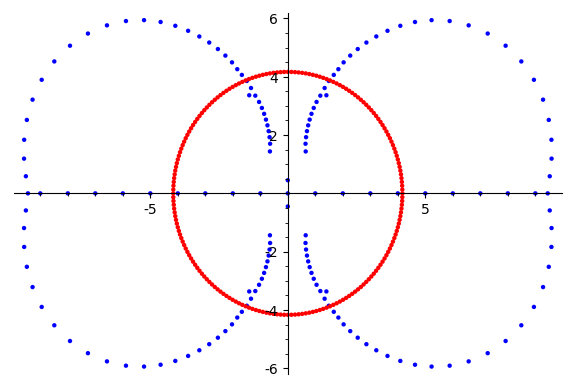

polynomial  80  degree:  243  good-root count:  143   root count:  243
----------------------------------------------------------------------------------


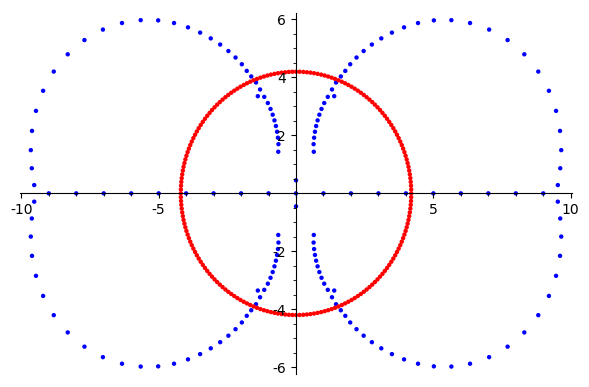

polynomial  81  degree:  246  good-root count:  144   root count:  246
----------------------------------------------------------------------------------


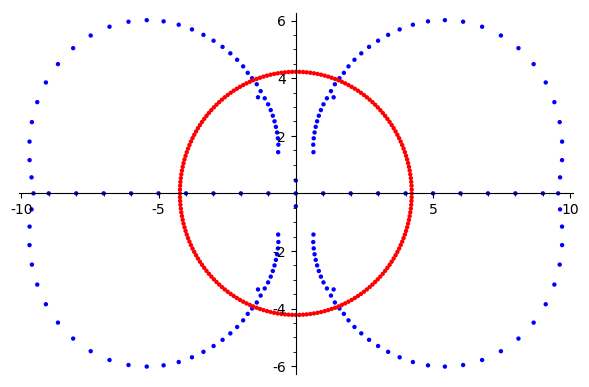

polynomial  82  degree:  249  good-root count:  145   root count:  249
----------------------------------------------------------------------------------


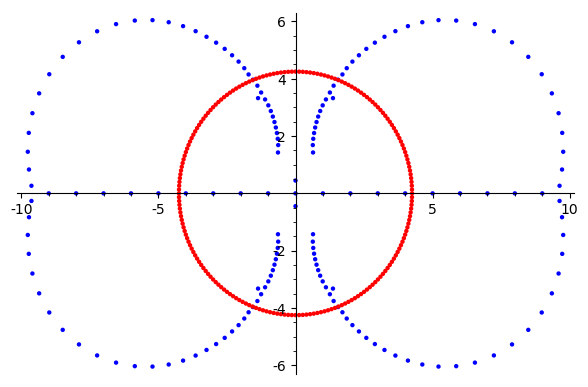

polynomial  83  degree:  252  good-root count:  146   root count:  252
----------------------------------------------------------------------------------


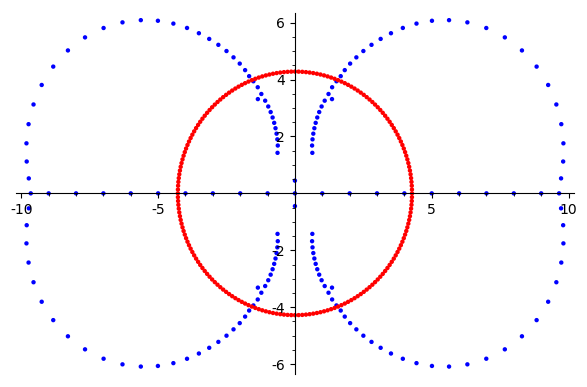

polynomial  84  degree:  255  good-root count:  151   root count:  255
----------------------------------------------------------------------------------


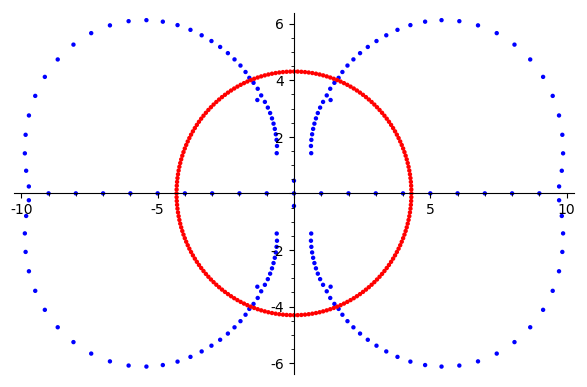

polynomial  85  degree:  258  good-root count:  152   root count:  258
----------------------------------------------------------------------------------


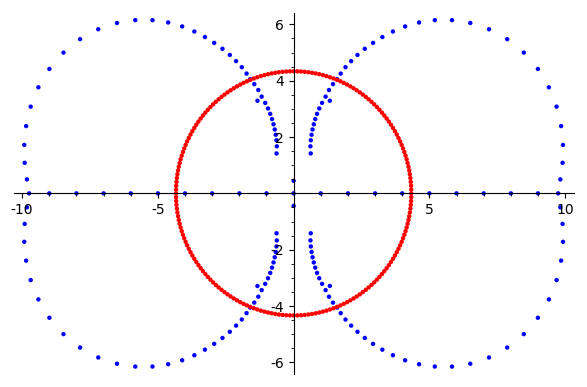

polynomial  86  degree:  261  good-root count:  153   root count:  261
----------------------------------------------------------------------------------


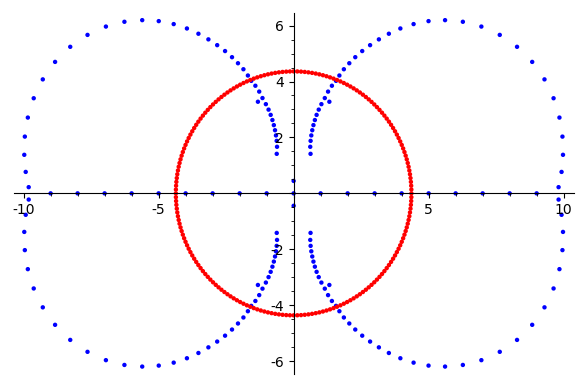

polynomial  87  degree:  264  good-root count:  158   root count:  264
----------------------------------------------------------------------------------


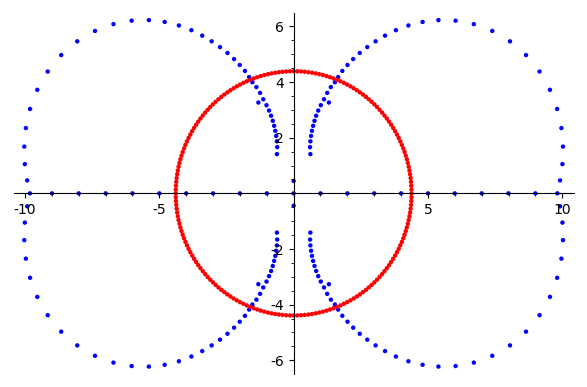

polynomial  88  degree:  267  good-root count:  159   root count:  267
----------------------------------------------------------------------------------


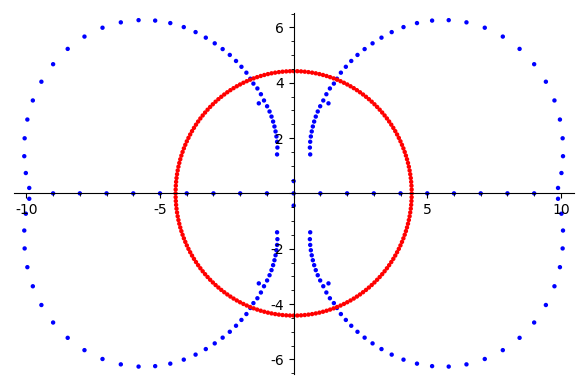

polynomial  89  degree:  270  good-root count:  160   root count:  270
----------------------------------------------------------------------------------


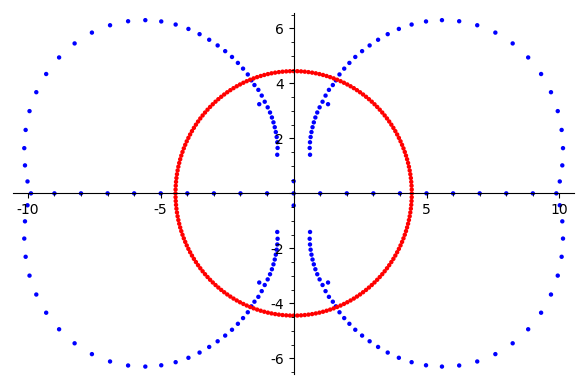

polynomial  90  degree:  273  good-root count:  165   root count:  273
----------------------------------------------------------------------------------


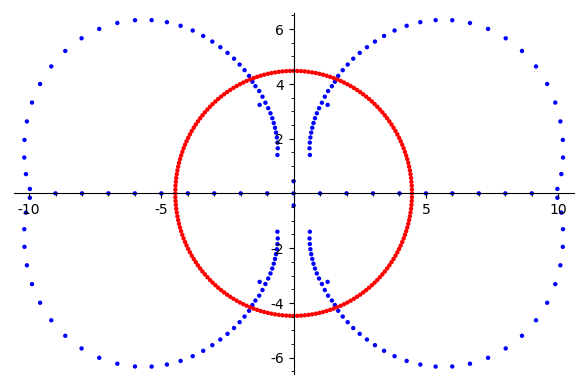

polynomial  91  degree:  276  good-root count:  166   root count:  276
----------------------------------------------------------------------------------


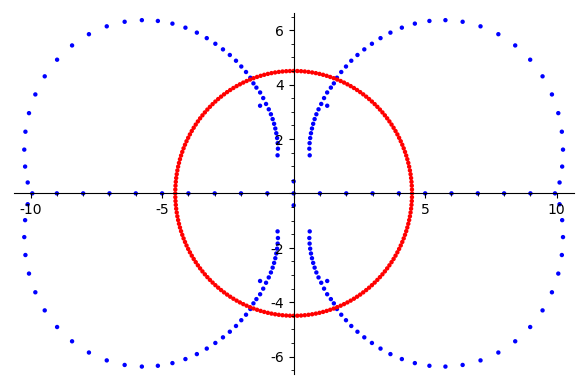

polynomial  92  degree:  279  good-root count:  167   root count:  279
----------------------------------------------------------------------------------


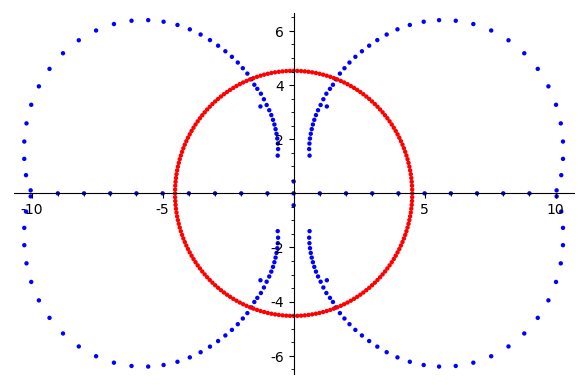

polynomial  93  degree:  282  good-root count:  172   root count:  282
----------------------------------------------------------------------------------


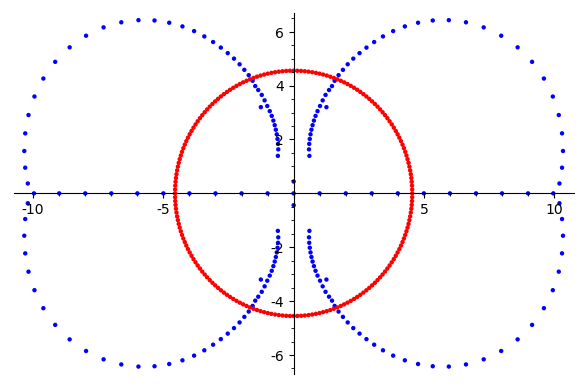

polynomial  94  degree:  285  good-root count:  173   root count:  285
----------------------------------------------------------------------------------


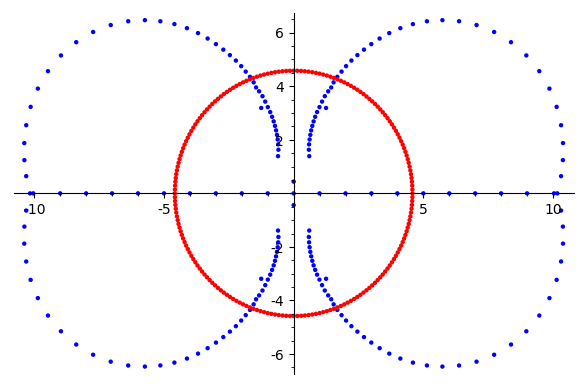

polynomial  95  degree:  288  good-root count:  174   root count:  288
----------------------------------------------------------------------------------


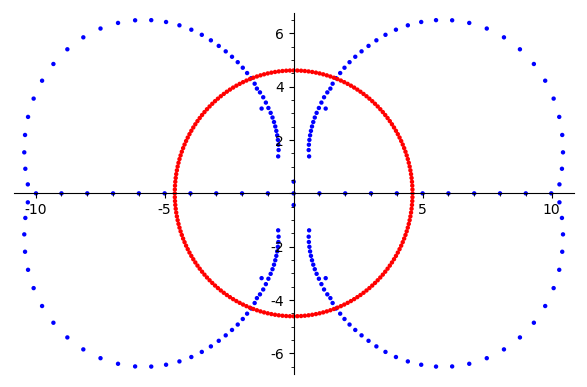

polynomial  96  degree:  291  good-root count:  175   root count:  291
----------------------------------------------------------------------------------


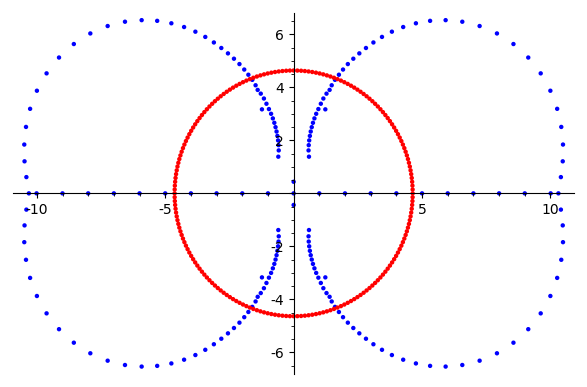

polynomial  97  degree:  294  good-root count:  180   root count:  294
----------------------------------------------------------------------------------


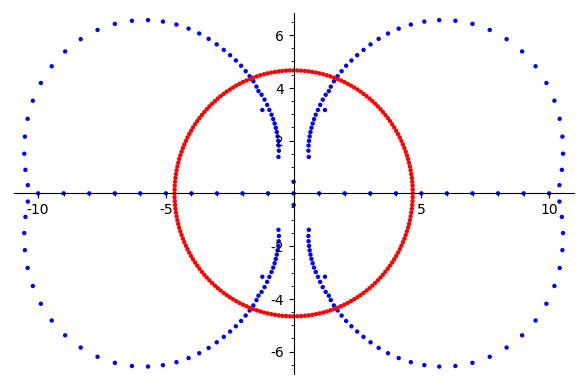

polynomial  98  degree:  297  good-root count:  181   root count:  297
----------------------------------------------------------------------------------


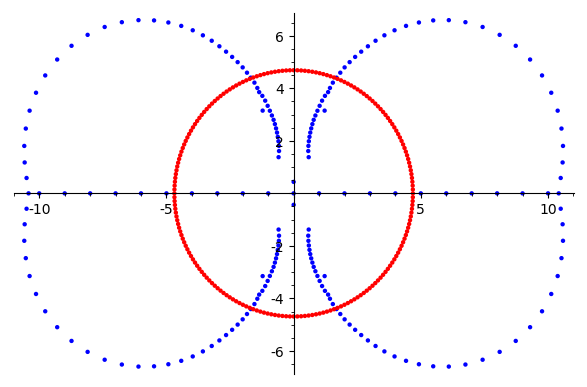

polynomial  99  degree:  300  good-root count:  182   root count:  300
----------------------------------------------------------------------------------


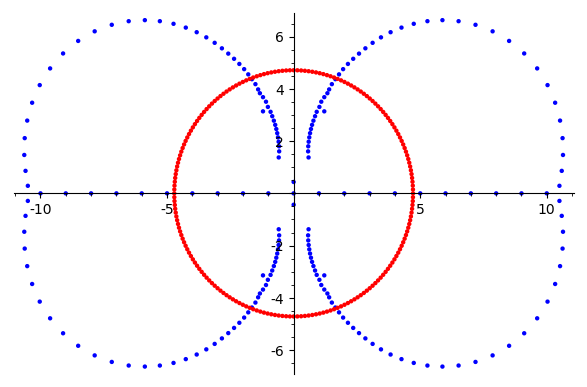

polynomial  100  degree:  303  good-root count:  187   root count:  303
----------------------------------------------------------------------------------


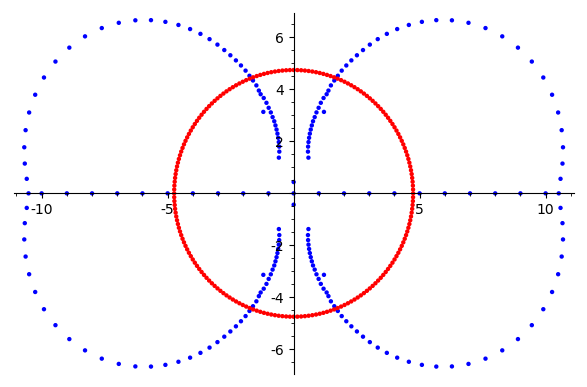

polynomial  101  degree:  306  good-root count:  188   root count:  306
----------------------------------------------------------------------------------


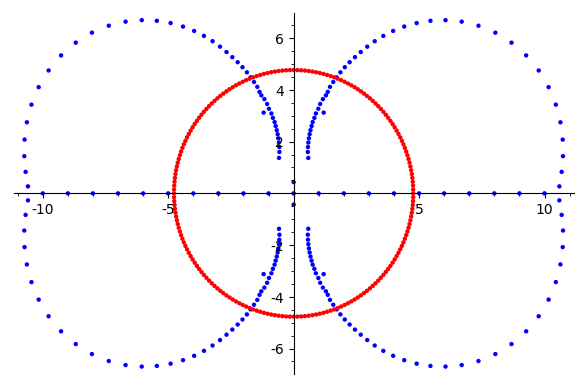

polynomial  102  degree:  309  good-root count:  189   root count:  309
----------------------------------------------------------------------------------


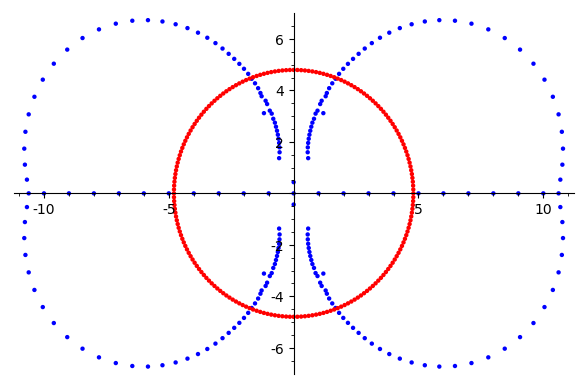

polynomial  103  degree:  312  good-root count:  194   root count:  312
----------------------------------------------------------------------------------


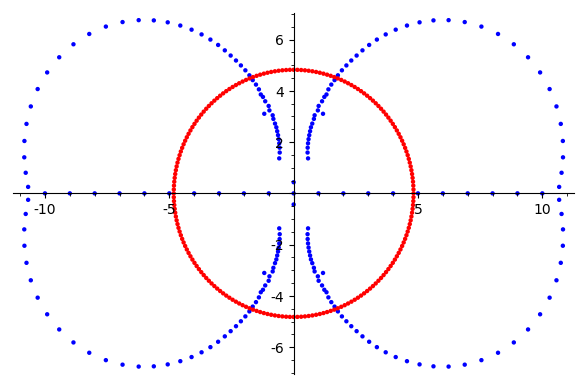

polynomial  104  degree:  315  good-root count:  195   root count:  315
----------------------------------------------------------------------------------


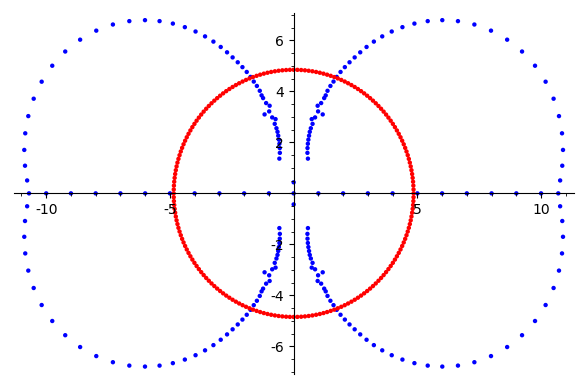

polynomial  105  degree:  318  good-root count:  196   root count:  318
----------------------------------------------------------------------------------


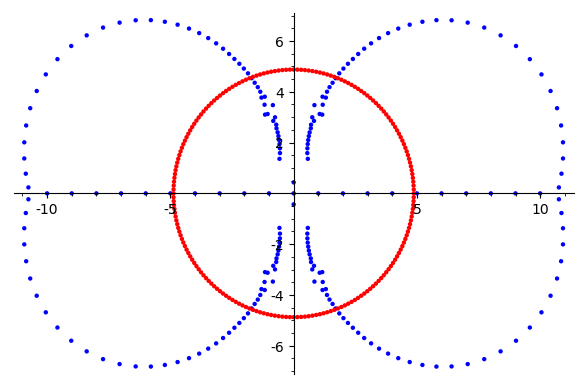

polynomial  106  degree:  321  good-root count:  201   root count:  321
----------------------------------------------------------------------------------


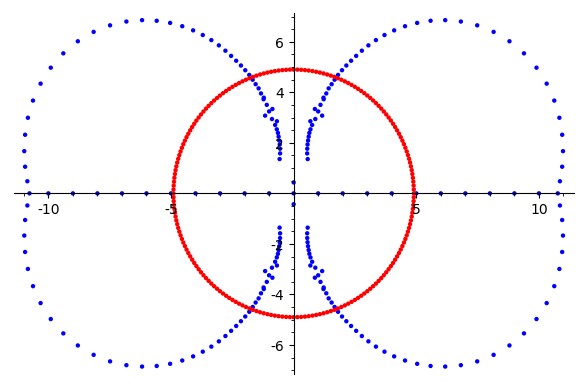

polynomial  107  degree:  324  good-root count:  202   root count:  324
----------------------------------------------------------------------------------


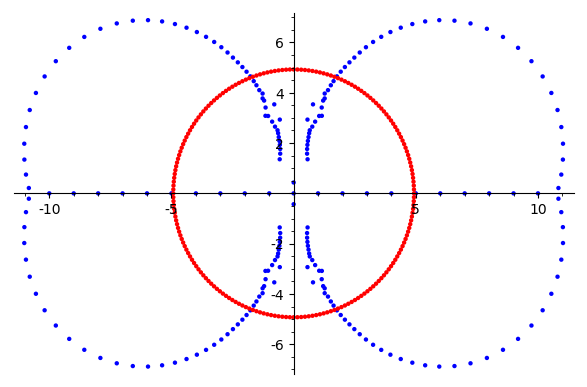

polynomial  108  degree:  327  good-root count:  203   root count:  327
----------------------------------------------------------------------------------


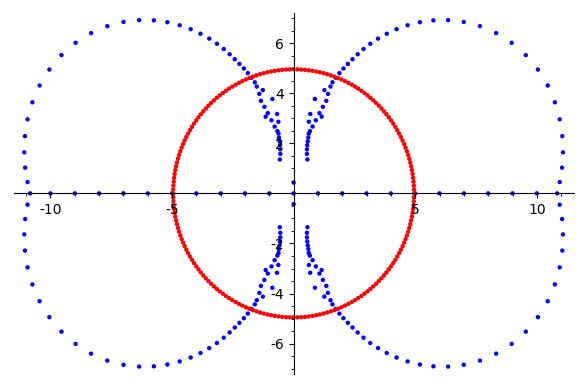

polynomial  109  degree:  330  good-root count:  208   root count:  330
----------------------------------------------------------------------------------


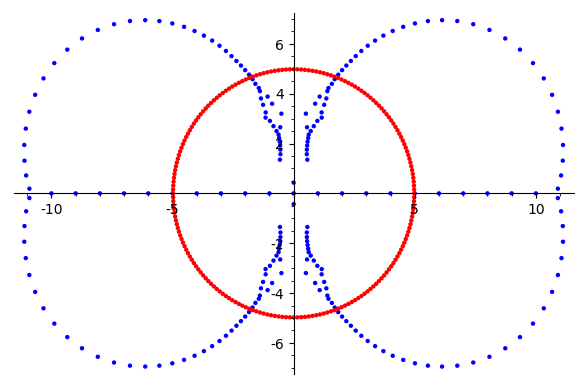

polynomial  110  degree:  333  good-root count:  209   root count:  333
----------------------------------------------------------------------------------


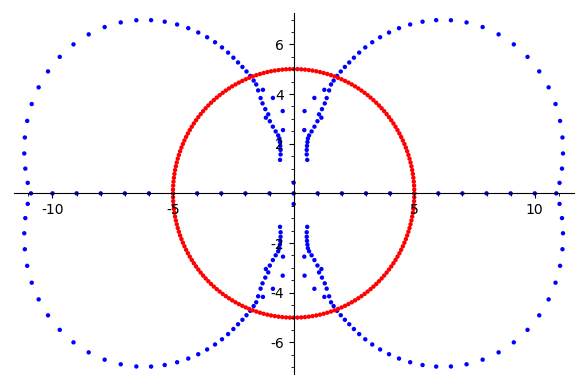

polynomial  111  degree:  336  good-root count:  212   root count:  336
----------------------------------------------------------------------------------


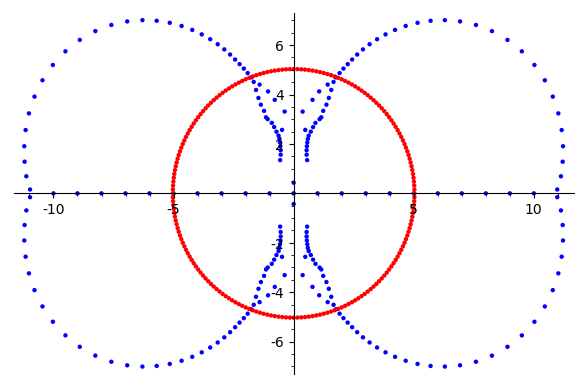

polynomial  112  degree:  339  good-root count:  217   root count:  339
----------------------------------------------------------------------------------


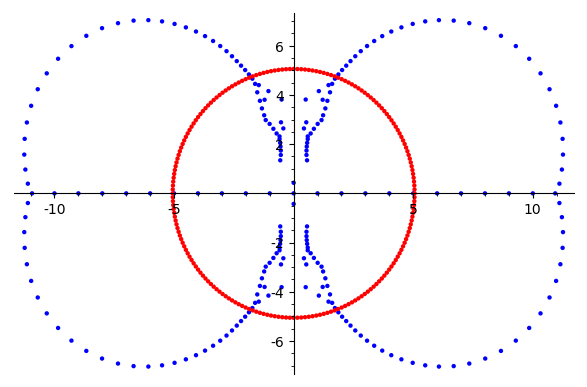

polynomial  113  degree:  342  good-root count:  218   root count:  342
----------------------------------------------------------------------------------


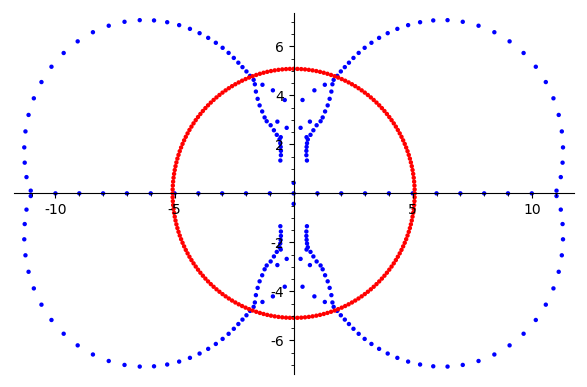

polynomial  114  degree:  345  good-root count:  219   root count:  345
----------------------------------------------------------------------------------


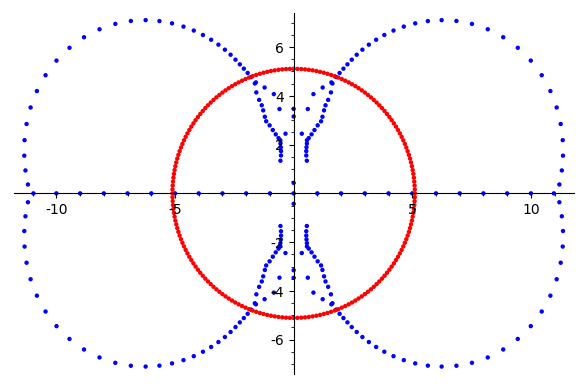

polynomial  115  degree:  348  good-root count:  224   root count:  348
----------------------------------------------------------------------------------


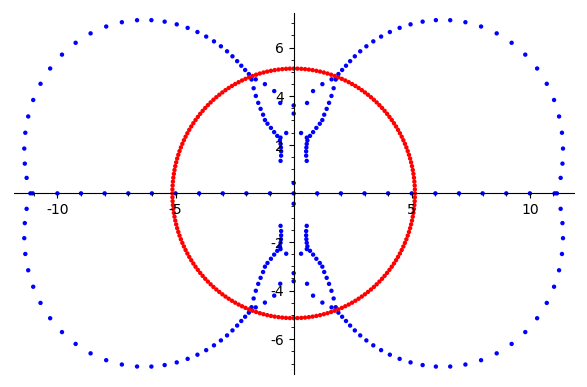

polynomial  116  degree:  351  good-root count:  225   root count:  351
----------------------------------------------------------------------------------


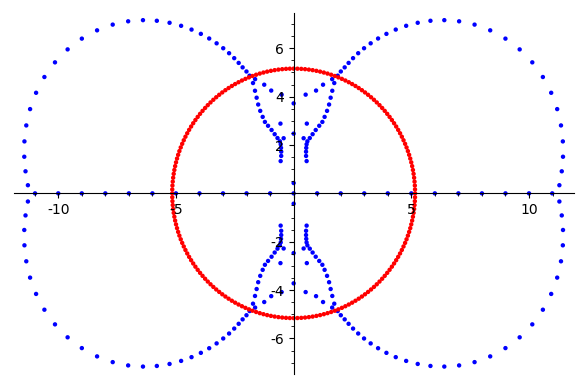

polynomial  117  degree:  354  good-root count:  226   root count:  354
----------------------------------------------------------------------------------


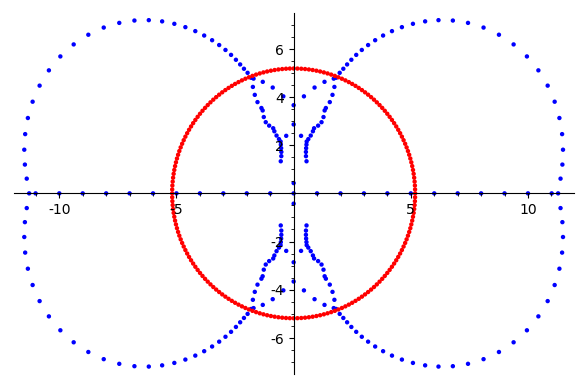

polynomial  118  degree:  357  good-root count:  231   root count:  357
----------------------------------------------------------------------------------


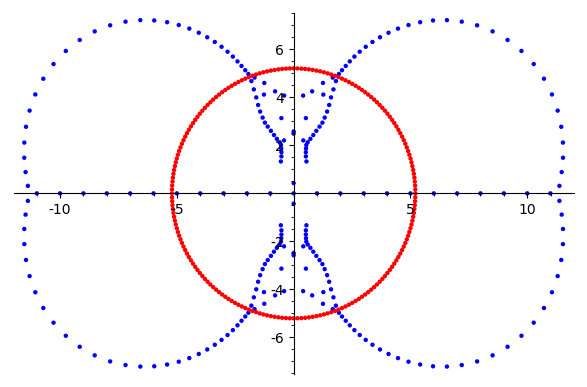

polynomial  119  degree:  360  good-root count:  232   root count:  360
***************************************************************************************
 discrepancies: 
[[3, 2], [4, 4], [5, 8], [6, 10], [7, 12], [8, 14], [9, 16], [10, 18], [11, 20], [12, 22], [13, 24], [14, 24], [15, 26], [16, 28], [17, 30], [18, 32], [19, 34], [20, 36], [21, 38], [22, 40], [23, 38], [24, 40], [25, 42], [26, 44], [27, 46], [28, 48], [29, 50], [30, 52], [31, 50], [32, 52], [33, 54], [34, 56], [35, 58], [36, 60], [37, 58], [38, 60], [39, 62], [40, 64], [41, 66], [42, 66], [43, 64], [44, 66], [45, 68], [46, 70], [47, 72], [48, 70], [49, 72], [50, 74], [51, 76], [52, 78], [53, 76], [54, 78], [55, 80], [56, 82], [57, 84], [58, 82], [59, 84], [60, 86], [61, 88], [62, 86], [63, 88], [64, 90], [65, 92], [66, 94], [67, 92], [68, 94], [69, 96], [70, 94], [71, 96], [72, 94], [73, 96], [74, 98], [75, 98], [76, 96], [77, 98], [78, 100], [79, 102], [80, 100], [81, 102], [82, 104], [83, 106], [84, 104], [85, 

In [15]:
import pickle
rfile = open('/Users/barrybrent/10mar21no8.txt','r')  # interpolating polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
lengths=[]
discrepancies=[]
for k in [3..len(s)-1]:
    print "----------------------------------------------------------------------------------"
    points=[]
    n=s[k][0]
    radius=n/ln(n)^2
    poly=R(s[k][1])
    pr=poly.roots(CC)
    lpr=len(pr)
    points=[]
    rootcount=0
    goodpoints=[]
    goodrootcount=0
    for j in [0..lpr-1]:
        rootpair=pr[j]
        (root,mult)=rootpair
        repart=real(root)
        impart=imaginary(root)
        root=[repart,impart]
        cplxroot=repart+I*impart
        points=points+[root]
        rootcount=rootcount+mult
        if absoluteValue(cplxroot,100)<radius:
            goodrootcount=goodrootcount+mult
    rootplot=list_plot(points,color='blue',size=10)
    circlepoints=[]
    for a in [0..199]:
        theta=(a/200)*(2*pi)
        point=[radius*cos(theta),radius*sin(theta)]
        circlepoints=circlepoints+[point]
    circle=list_plot(circlepoints,color='red')
    show(rootplot+circle)
    pd=poly.degree();rc=rootcount;grc=goodrootcount
    if pd>grc:discrepancies=discrepancies+[[n,pd-grc]]
    print "polynomial ",n," degree: ",pd," good-root count: ",grc,"  root count: ",rc
print "***************************************************************************************"
print " discrepancies: "
if len(discrepancies)==0:print "none"
if len(discrepancies)>0:print(discrepancies)
        


